# Basics of Pandas Data Objects

## Notes
“While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.”



In [ ]:
import pandas as pd
import numpy as np

## Series and DataFrame
The most important concepts to understand about Pandas is their two main 
data structers: Series and DataFrame.  We will walk through each of these in turn. 
## Series
* A one-dimensional array-like object 
* Uses NumPy ndarray
* Contains a sequence of values
* Has an Index (data labels)

#### ==> Think of a Column of Data <==
a fixed-length, ordered dictionary that maps index values to data values

### Three ways to define a Series
#### 1. From data
Since we didn't specify an Index, the default is used (0, 1, ..., n-1)

In [ ]:
data = [21, 19, 28, 32]
age = pd.Series(data)
age

#### 2. From data and an index
Pass an index as a list of names.

In [ ]:
index = ['Mary', 'Jose', 'Cal', 'Tina']
age = pd.Series(data, index)
print(age)

#### 3. From a dictionary
Use a dictionary object to pass the index and values together.

In [ ]:
data_dict = {'Mary': 21, 'Jose': 19, 'Cal': 28, 'Tina':32}
age = pd.Series(data_dict)
print(age)

### What can we do with a Series?
#### As always you can get a list of methods and attributes age.[TAB]

In [ ]:
age.

#### You can access values using the Index (labels), the default integer indicies or as an attribute.

In [8]:
age['Jose']

19

In [9]:
age[1]

19

In [12]:
age.Jose

19

In [13]:
# the NumPy ndarray representation of the values
age.values

array([21, 19, 28, 32])

In [14]:
# the Index
age.index

Index(['Mary', 'Jose', 'Cal', 'Tina'], dtype='object')

In [17]:
age.where(age < 21)

Mary     NaN
Jose    19.0
Cal      NaN
Tina     NaN
dtype: float64

### Hundreds of class methods associated with Series.

<AxesSubplot:>

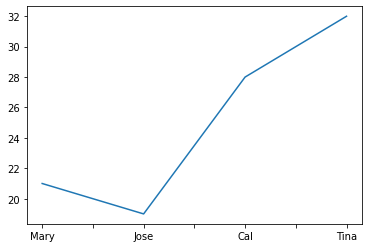

In [18]:
age.plot()

### Subsetting and Filtering
Consider this line of code.

In [37]:
not_minor = age[age > 20]
minor = age[age < 21]

In [39]:
not_minor

Mary    21
Cal     28
Tina    32
dtype: int64

What's happening here?

In [30]:
age > 21

Mary    False
Jose    False
Cal      True
Tina     True
dtype: bool

This is filtering with a boolean array.

In [42]:
age[age>21]

Cal     28
Tina    32
dtype: int64

### Operating on a Series

In [43]:
2021-age

Mary    2000
Jose    2002
Cal     1993
Tina    1989
dtype: int64

In [44]:
'Cal' in age

True

### You can name the Series and the Index

In [45]:
age.name = 'Age'
age.index.name = 'Person'

In [46]:
age

Person
Mary    21
Jose    19
Cal     28
Tina    32
Name: Age, dtype: int64

## DataFrame
* A rectengular table of data 
* Contains an ordered collection of columns
* Has a row and column index

### ==> Think of a collection of Columns of Data <==
a dictionary of Series, all sharing the same index

### Creating a DataFrame

In [54]:
data = {'Name'  : ['Mary', 'Jose', 'Cal', 'Tina'],
        'Age'   : [21, 19, 28, 32],
        'Weight': [120, 140, 135, 122]
       }
student_ID_index = [364, 238, 812, 512]
students = pd.DataFrame(data, index=student_ID_index)    
students.index.name = "ID"

,Age,Weight
count,4.000000,4.000000
mean,25.000000,129.250000
std,6.055301,9.776673
min,19.000000,120.000000
25%,20.500000,121.500000
50%,24.500000,128.500000
75%,29.000000,136.250000
max,32.000000,140.000000


In [52]:
data['Name']

['Mary', 'Jose', 'Cal', 'Tina']

In [48]:
students.columns

Index(['Name', 'Age', 'Weight'], dtype='object')

In [49]:
students.describe()

,Age,Weight
count,4.000000,4.000000
mean,25.000000,129.250000
std,6.055301,9.776673
min,19.000000,120.000000
25%,20.500000,121.500000
50%,24.500000,128.500000
75%,29.000000,136.250000
max,32.000000,140.000000


In [ ]:
names = students['Name']
names

### Adding a  Column

In [ ]:
GPA = pd.Series([3.4, 4.0, 3.9, 4.1], index=[364, 238, 812, 512])
students['GPA'] = GPA
students

In [ ]:
students['Alcohol'] = students.Age >= 21
students

### Deleting a Column

In [ ]:
del students['Alcohol']
students

### Transpose a DataFrame

In [ ]:
students.T

In [ ]:
students.values

## Index Objects
Index objects are created automatically with Series and DataFrames however users often don't pay attention to them. It's very important to understand how they work in order to be fully utilized.
* Hold axis labels and names.
* Have methods and properties to support set logic.
* Created from any array or sequence of labels.
* They are immutable so cannot be directly modified.
* Duplicate labels are OK

In [ ]:
s = pd.Series(['zero', 'twenty', 'forty', 'sixty', 'eighty'],
              index=np.arange(0, 100, 20))
s

In [ ]:
s[40]

In [ ]:
i = s.index
i

In [ ]:
j = pd.Index()